In [4]:
# import the packages to be used in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# To read the data

df = pd.read_csv(r'C:\Users\User\Desktop\Projects\movies.csv')


In [5]:
# checking the data

df.head()



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [3]:
# cleaning the data

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [13]:
# change data type of colums

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 



In [6]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [15]:
df = df.dropna(how='any',axis=0) 


In [16]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [19]:
df['yearaccurate'] = df['released'].astype(str).str.split(', ').str[-1].astype(str).str[:4]

In [18]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [22]:
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,yearaccurate
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0,2020,2020
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,0,3661,Prowess Pictures,98.0,2020,2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,0,413378,Pryor Entertainment,120.0,2020,2020
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,0,Notis Studio,78.0,2020,2020
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,0,13266,Roxwell Films,87.0,2020,2020


In [29]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [28]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [34]:
pd.set_option('display.max_rows', None)

In [32]:
df.groupby(['company', 'year'])[["gross"]].sum()


gross
company                                            year              
"DIA" Productions GmbH & Co. KG                    2003  4.435093e+07
"Weathering With You" Film Partners                2019  1.934575e+08
.406 Production                                    1996  1.058000e+04
1+2 Seisaku Iinkai                                 2000  1.196218e+06
10 West Studios                                    2010  8.149060e+05
120 Films                                          2002  6.479328e+06
120dB Films                                        2009  2.667600e+04
                                                   2016  3.683720e+05
13 Productions                                     2000  2.546100e+04
1492 Pictures                                      1996  1.298324e+08
                                                   1999  8.742386e+07
1818 Productions                                   1983  1.223263e+07
19 Entertainment                                   2003  4.928883e+06
1978 Films                                         2017  4.065640e+07
1984 Private Defense Contractors                   2014  5.883438e+07
1992 Number Four Limited Partnership               1995  4.686937e+06
2 Loop Films                                       2002  2.643490e+05
2.0 Entertainment                                  2019  1.228104e+08
2.4.7. Films                                       2007  2.278398e+07
2003 Productions                                   2004  6.942439e+07
20th Century Studios                               2020  1.111055e+08
21 Laps Entertainment                              2014  4.129632e+07
                                                   2018  4.114238e+07
21st Century Film Corporation                      1989  3.953745e+06
                                                   1990  7.658401e+06
21st Century Films                                 1994  1.702394e+06
25th Hour Productions                              2002  2.393206e+07
26 Films                                           2009  2.045887e+07
2929 Productions                                   2007  7.248490e+06
                                                   2008  2.870518e+07
                                                   2014  5.092129e+06
2DUX²                                              2016  6.781500e+05
                                                   2018  1.977444e+08
3 Arts Entertainment                               1996  6.020933e+07
                                                   1997  7.581243e+07
                                                   2001  7.118650e+07
                                                   2010  6.496260e+05
                                                   2013  3.909596e+06
                                                   2014  1.614593e+08
                                                   2015  3.660674e+07
                                                   2019  2.238656e+07
3 Miles Apart Productions Ltd.                     1999  8.408835e+06
3311 Productions                                   2013  3.114953e+06
                                                   2017  5.042014e+06
360 Pictures                                       2007  9.669758e+06
391 Productions                                    1998  1.960216e+06
                                                   1999  9.244200e+04
3B Productions                                     1999  0.000000e+00
                                                   2003  1.679990e+05
3Mark Entertainment                                2001  4.760014e+06
4 1/2 Film                                         2006  1.297260e+06
4 Kids Entertainment                               1999  1.339493e+08
40 Acres & A Mule Filmworks                        1986  7.137502e+06
                                                   1989  3.729544e+07
                                                   1995  1.540344e+07
                                                   1999  3.457378e+07
    

In [25]:
# drop any duplicate

df['company'].drop_duplicates().sort_values(ascending = False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [21]:
# Budget high correlation


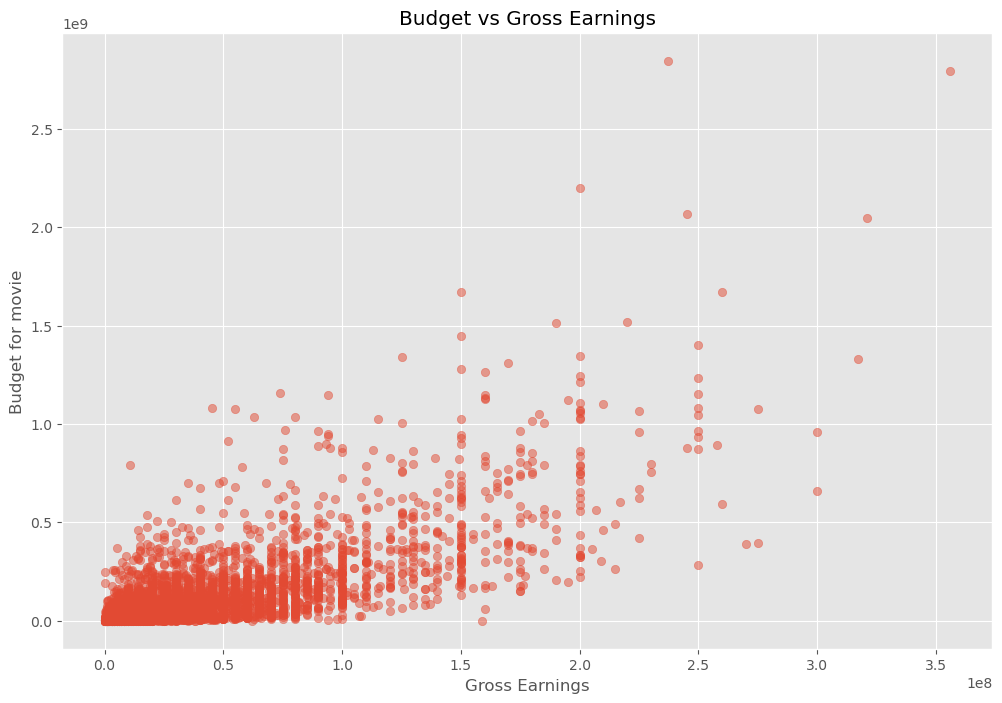

In [31]:
# scatter plot with 'budget and gross' to compare both 

plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for movie')
plt.show()

<Axes: xlabel='gross', ylabel='budget'>

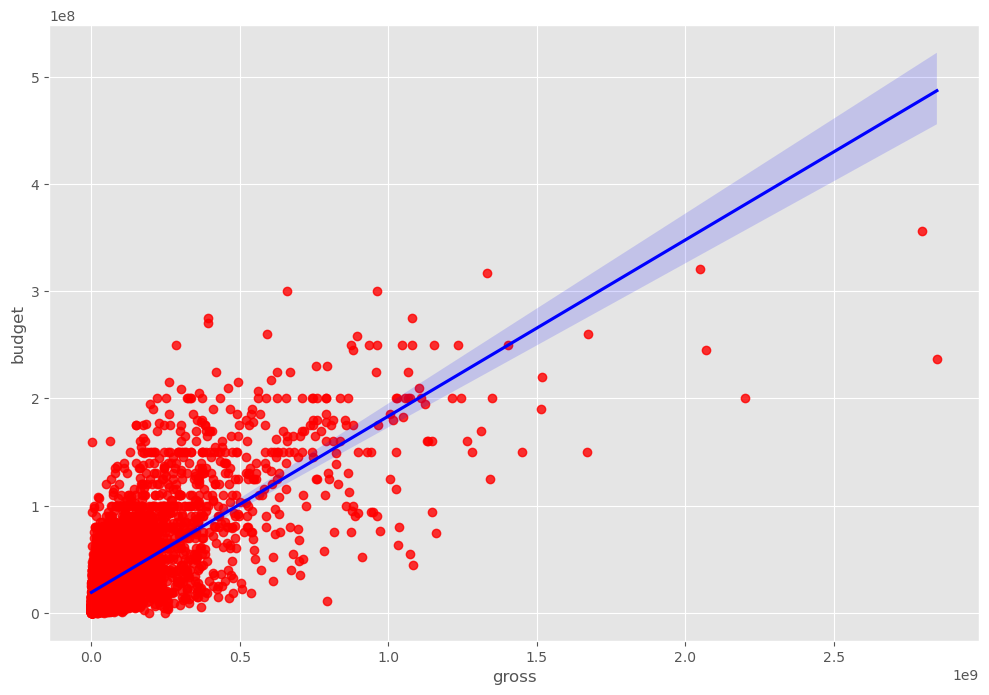

In [41]:
# plot budget vs gross using seaborn (regplot)

sns.regplot(x="gross", y="budget", data=df, scatter_kws ={"color":"red"},line_kws = {"color": "blue"})

In [44]:
# looking at the correlation

In [58]:
df.corr(numeric_only = True)


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


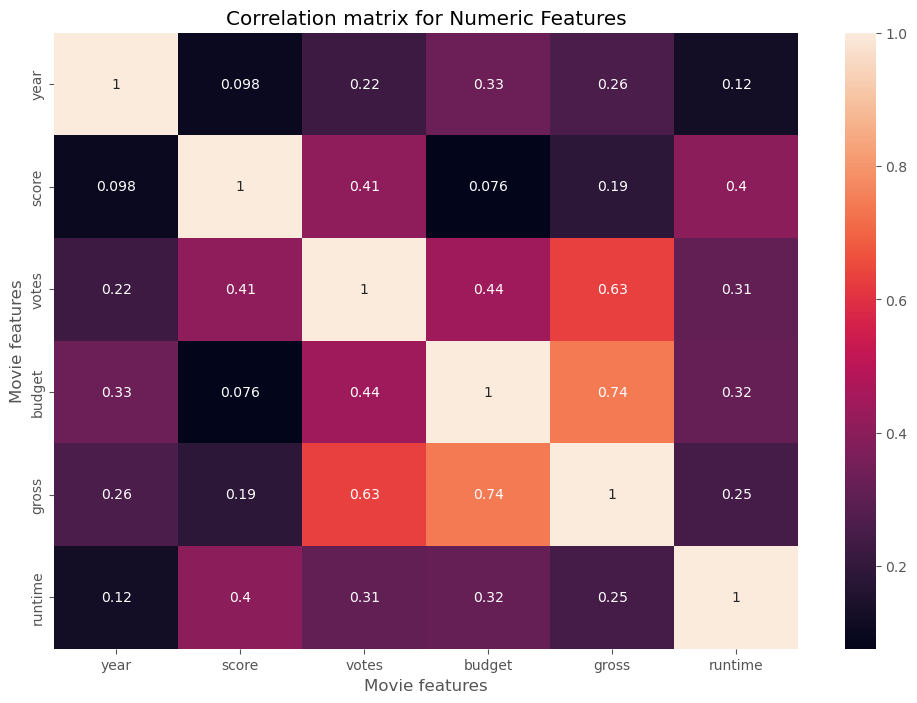

In [60]:
correlation_matrix = df.corr(numeric_only = True)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [ ]:
# votes and budget has the highest correlation to gross earnings
# score has the lowest correlation to gross earnings